In [19]:
import pandas as pd
housing = pd.read_csv("train.csv")
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
# Specify the columns you want to drop
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

# Drop the specified columns
housing = housing.drop(columns=columns_to_drop)

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
# Identify numerical and categorical columns with missing values
numerical_cols_with_missing = housing.select_dtypes(include=np.number).columns[housing.select_dtypes(include=np.number).isnull().any()]
categorical_cols_with_missing = housing.select_dtypes(exclude=np.number).columns[housing.select_dtypes(exclude=np.number).isnull().any()]

# Fill numerical columns with the median
for col in numerical_cols_with_missing:
    housing[col].fillna(housing[col].median(), inplace=True)

# Fill categorical columns with "None"
for col in categorical_cols_with_missing:
    housing[col].fillna("None", inplace=True)

# Verify the changes
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<ipython-input-23-075a595c1f7d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing[col].fillna(housing[col].median(), inplace=True)
<ipython-input-23-075a595c1f7d>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical columns (excluding those already handled)
categorical_cols = housing.select_dtypes(exclude=np.number).columns

# Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    housing[col] = label_encoder.fit_transform(housing[col])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #handle_unknown='ignore' added
encoded_features = onehot_encoder.fit_transform(housing[categorical_cols])

# Create new DataFrame for one-hot encoded columns
encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate the one-hot encoded features with the original DataFrame
housing = pd.concat([housing, encoded_df], axis=1)

# Drop the original categorical columns
housing = housing.drop(columns=categorical_cols)

# Display the updated DataFrame
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 288 entries, Id to SaleCondition_5
dtypes: float64(253), int64(35)
memory usage: 3.2 MB
None


In [31]:
X = housing.drop('SalePrice', axis=1)
y = housing['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed


In [33]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
254,255,20,70.0,8400,5,6,1957,1957,0.0,922,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,1067,60,59.0,7837,6,7,1993,1994,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,639,30,67.0,8777,5,7,1910,1950,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,800,50,60.0,7200,5,7,1937,1950,252.0,569,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,381,50,50.0,5000,5,6,1924,1950,0.0,218,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
y_train.head()

,SalePrice
254,145000
1066,178000
638,85000
799,175000
380,127000


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
print(model.coef_)
model.intercept_

[ 6.31570537e-01  5.33876512e+01  2.98341051e+01  6.50805488e-01
  6.79136961e+03  5.72378920e+03  3.50848802e+02  1.31661208e+02
  2.13209754e+01  1.79049972e+01  7.90184639e+00 -1.31901493e-01
  2.56750509e+01  1.00940718e+01  3.05350190e+01 -1.06143507e+01
  3.00147516e+01  1.38294963e+03 -1.57512194e+03  2.79340129e+03
  1.27475838e+03 -2.57559763e+03 -1.27236208e+04  1.40490953e+03
  6.50084232e+03 -3.31909554e+01  1.31411925e+03  3.06291547e+01
  1.55384522e+01 -4.66548891e-01  1.94282033e+00  4.99238435e+01
  2.50258636e+01  7.82534278e+01 -2.26837418e-01 -4.14773031e+02
 -2.46674003e+02 -1.83502678e+04  1.17151492e+04  4.71506993e+02
  2.51840741e+03  3.64520413e+03 -1.11122129e+04  1.11122129e+04
 -3.98051565e+03  2.68032015e+03  3.75160387e+03 -2.45140837e+03
 -2.26048785e+03  1.13754903e+04 -1.06504596e+04  1.53545720e+03
  1.21232168e+04 -1.21232168e+04  3.91110112e+03  1.42900586e+04
 -3.24037933e+03 -1.84001600e+04  3.43937960e+03  1.30163071e+04
  1.78917088e+04 -3.09080

-577254.024382238

In [43]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
892,893,20,70.0,8414,6,8,1963,2003,0.0,663,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,1106,60,98.0,12256,8,5,1994,1995,362.0,1032,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,414,30,56.0,8960,5,6,1927,1950,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,523,50,50.0,5000,6,7,1947,1950,0.0,399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,1037,20,89.0,12898,9,5,2007,2008,70.0,1022,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,50.0,5925,4,7,1937,2000,435.0,168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1361,1362,20,124.0,16158,7,5,2005,2005,16.0,1274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
802,803,60,63.0,8199,7,5,2005,2005,0.0,648,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
651,652,70,60.0,9084,4,5,1940,1950,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
y_pred = model.predict(X_test)
y_pred

array([157533.81870225, 355093.19763684,  86855.90572095, 179918.02855665,
       321013.2788347 ,  70146.88684245, 236438.66412883, 147547.11479965,
        61376.6407969 , 147547.54467488, 144522.85449466, 102294.38645923,
        80005.26907767, 219382.27993916, 175872.27612838, 131689.71278017,
       185953.46550487, 131956.27415089, 127405.33677503, 215141.61987755,
       151598.41644119, 206392.61581178, 170465.7417567 , 128350.66195643,
       200931.06545712, 136736.65920456, 195813.34279659, 106623.4911967 ,
       176968.11415758, 200440.17721241, 153522.40938315, 275765.76582298,
       250632.35408932, 110172.93950778, 237901.43394879, 150001.38309816,
       138740.64435682, 198857.99095562, 313313.01579097, 122301.53862212,
       119652.98297594, 220319.73031136, 100946.7845764 , 371916.38866429,
       131989.99228154, 136799.46244803,  97787.88048863, 139268.1136059 ,
       418100.93114134, 131321.92963598, 118772.76670223, 274030.85579688,
        98076.97973713, 2

In [42]:
y_test

,SalePrice
892,154500
1105,325000
413,115000
522,159000
1036,315500
...,...
479,89471
1361,260000
802,189000
651,108000


In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 876261511.2541778


In [45]:
from sklearn.metrics import r2_score

# ... (Your existing code) ...

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8857595508215651


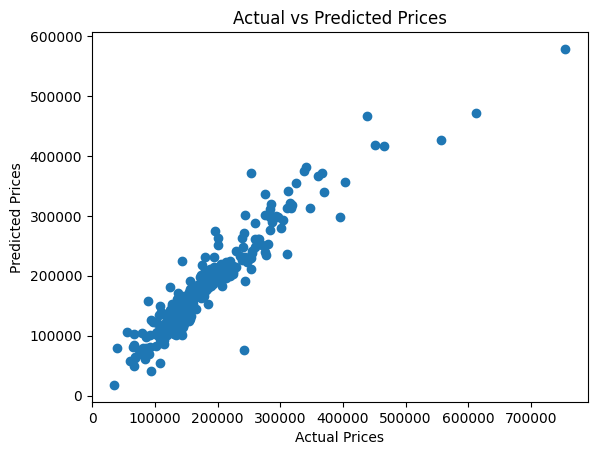

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()